In [1]:
import torch
import math
import numpy as np
from data_loader import NEFG3x3Set
from AE import AE
import matplotlib.pyplot as plt


# Download the MNIST Dataset
dataset = NEFG3x3Set("info.csv", "data_3x3_10", "dat_std",transform=True)

length = len(dataset)
train_split = math.floor(length*.7)
test_split = length - train_split

train_inds, test_inds = torch.utils.data.random_split(dataset, [train_split, test_split], generator=torch.Generator().manual_seed(42))



# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3)

train_data = torch.utils.data.DataLoader(dataset=train_inds, batch_size=32,
                                            shuffle=True)
test_data = torch.utils.data.DataLoader(dataset=test_inds, batch_size=32,
                                            shuffle=True)


In [2]:
epochs = 32
outputs = []
losses = []
local_loss  = 0
txt1 = "Epoch {epoch} / "+str(epochs)
txt2 = "Average training loss: {loss}"
txt3 = "Average test loss: {loss}"

for epoch in range(epochs):
    print(txt1.format(epoch = epoch))
    for (inp, tar) in train_data:
        model.train()
        inp = inp.reshape(-1, 26*26).float()
        tar = tar.reshape(-1, 26*26).float()

        # Output of Autoencoder
        reconstructed = model(inp)

        # Calculating the loss function
        loss = loss_function(reconstructed, tar)
        local_loss+=loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(txt2.format(loss = local_loss/len(train_data)))
    local_loss = 0
    
    for (inp, tar) in test_data:
        model.eval()
        
        inp = inp.reshape(-1, 26*26).float()
        tar = tar.reshape(-1, 26*26).float()
        # Output of Autoencoder
        reconstructed = model(inp)

        # Calculating the loss function
        loss = loss_function(reconstructed, tar)
        local_loss+=loss

    
    print(txt3.format(loss = local_loss/len(test_data)))
    losses.append(local_loss/len(test_data))
    local_loss = 0



Epoch 0 / 32
Average training loss: 0.1992780864238739
Average test loss: 0.16349181532859802
Epoch 1 / 32
Average training loss: 0.09944168478250504
Average test loss: 0.08866757154464722
Epoch 2 / 32
Average training loss: 0.095343679189682
Average test loss: 0.09793519973754883
Epoch 3 / 32
Average training loss: 0.08571520447731018
Average test loss: 0.0818672925233841
Epoch 4 / 32
Average training loss: 0.07911840081214905
Average test loss: 0.08263815939426422
Epoch 5 / 32
Average training loss: 0.08141212165355682
Average test loss: 0.07940241694450378
Epoch 6 / 32
Average training loss: 0.07865691930055618
Average test loss: 0.07877568155527115
Epoch 7 / 32
Average training loss: 0.07698511332273483
Average test loss: 0.08169855922460556
Epoch 8 / 32
Average training loss: 0.08475220203399658
Average test loss: 0.07513695955276489
Epoch 9 / 32
Average training loss: 0.07545927166938782
Average test loss: 0.09251455962657928
Epoch 10 / 32
Average training loss: 0.077253118157386

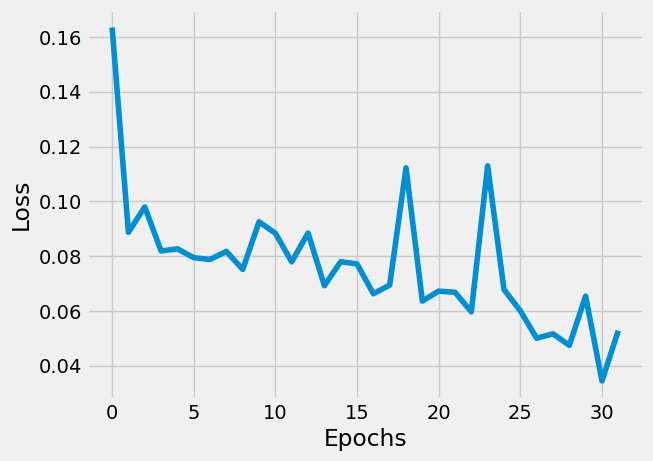

In [3]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Plotting the last 100 values
a = [i.detach().numpy() for i in losses]

plt.plot(a)
plt.show()

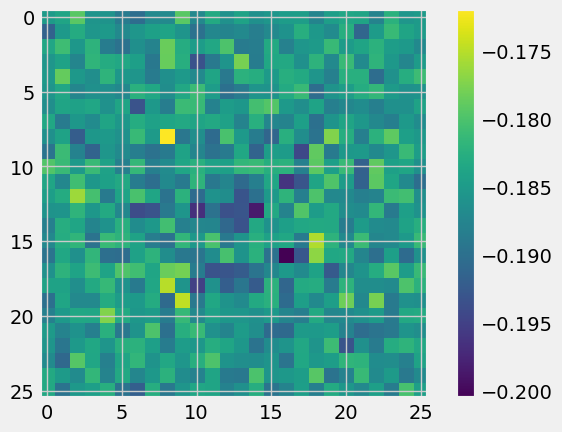

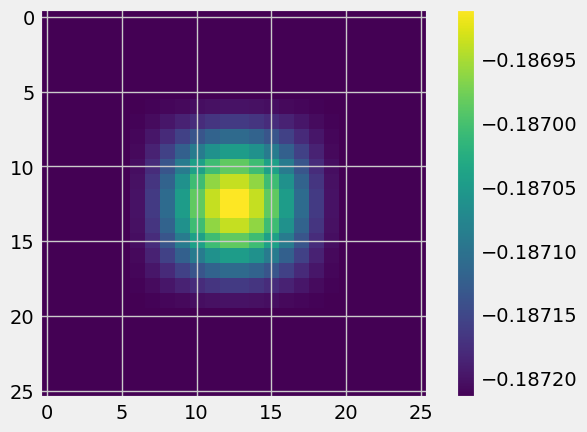

tensor(-0.1872) tensor(-0.1869)


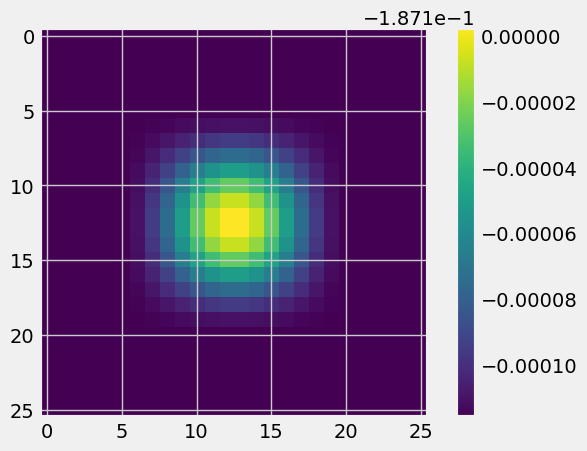

In [6]:

# 1600
# 1500 - example of very small data
# 1000
# 3000 - bigger numbers
(inp, tar) = dataset[50]
inp = inp.reshape(26*26).float()

rec = model(inp).float().reshape(26,26)

fig, ax = plt.subplots()
pos = ax.imshow(rec.detach().numpy())
c_bar = fig.colorbar(pos, ax=ax)
plt.show()

fig, ax = plt.subplots()
inp = inp.reshape(26,26).float()
pos = ax.imshow(inp.detach().numpy())
c_bar = fig.colorbar(pos, ax=ax)
plt.show()
print(inp.min(),inp.max())

fig, ax = plt.subplots()
tar = tar.reshape(26,26).float()
pos = ax.imshow(tar.detach().numpy())
c_bar = fig.colorbar(pos, ax=ax)
plt.show()



# fig, ax = plt.subplots()
# dif = rec-tar
# pos = ax.imshow(dif.detach().numpy())
# c_bar = fig.colorbar(pos, ax=ax)
# plt.show()

